In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


# Generate Toy Data


In [4]:
# multiple runs of the current code will generate the same data (on different computers; delete this cell if not needed)
np.random.seed(42)
tf.random.set_seed(42)


In [7]:
# Random linear data - training data (100 points between 0-50):
n = 100
X = np.linspace(0, 50, n)
y = np.linspace(0, 50, n)

# Adding noise to the random linear data:
X += np.random.uniform(-10, 10, n)
y += np.random.uniform(-10, 10, n)

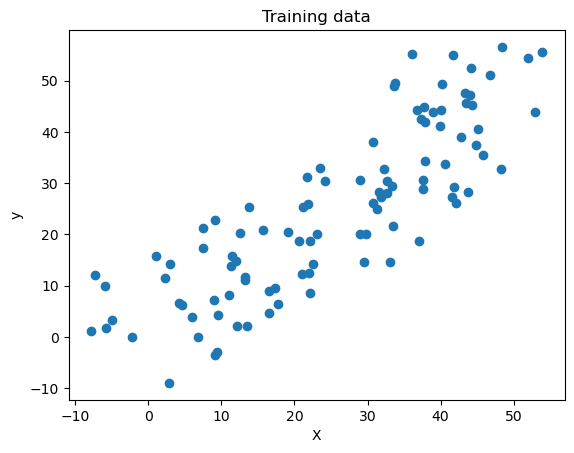

In [8]:
# Plot the training data:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training data')
plt.show()




# Supervised learning: Create a Linear Regression Model to fit this data and generate a regression line

In [25]:
class LinearModel:  # Linear Regression
    # it will generate y_pred = W*X + b (weights times input + bias)
    # the model learns the W and the b so that y_pred is close to real y in our data

    # initialize the W and the b with some randome values
    # (no need for placeholders anymore (Tensorflow 2 vs 1) )
    def __init__(self):
        self.W = tf.Variable(13.0)
        self.b = tf.Variable(4.0)

    def loss(init, y, y_pred):
        return tf.reduce_mean(tf.square(y - y_pred))  # mean square error between y and y_pred

    def train(self, X, y, lr = 0.0001, epochs = 20, verbose=True):  # X = input feature vectors, y = data labels, 
                                                                    # lr = learning rate, epochs = # of epochs,
                                                                    # verbose = print intermediate results
        
        def train_step():
            with tf.GradientTape() as t:  # compute gradients for some Python functions
                current_loss = self.loss(y, self.predict(X))  # calculate the current loss between the true label 
                                                                # and the current prediction of this label
            # get gradients of the weigts and the biases:
            dW, db = t.gradient(current_loss, [self.W, self.b]) # pass W and b as a list to t.gradient; get current loss
            # update W and b:
            self.W.assign_sub(lr * dW)  # substract: W -= lr * dW (not possible to use directly, as dW and db are tf variables)
            self.b.assign_sub(lr * db)

            return current_loss

        for epoch in range(epochs):
            current_loss = train_step()
            if verbose:
                print(f'Epoch {epoch}: Loss: {current_loss.numpy()}')  # eager excecution (numpy value of the tf tensor)
    
    def predict(self, X):
        return self.W * X + self.b
      

# Use the model

Epoch 0: Loss: 132464.609375
Epoch 1: Loss: 89309.0390625
Epoch 2: Loss: 60221.4296875
Epoch 3: Loss: 40615.875
Epoch 4: Loss: 27401.365234375
Epoch 5: Loss: 18494.556640625
Epoch 6: Loss: 12491.2099609375
Epoch 7: Loss: 8444.84765625
Epoch 8: Loss: 5717.5263671875
Epoch 9: Loss: 3879.263671875
Epoch 10: Loss: 2640.2421875
Epoch 11: Loss: 1805.1190185546875
Epoch 12: Loss: 1242.231689453125
Epoch 13: Loss: 862.8353271484375
Epoch 14: Loss: 607.1156005859375
Epoch 15: Loss: 434.7559814453125
Epoch 16: Loss: 318.5824279785156
Epoch 17: Loss: 240.27938842773438
Epoch 18: Loss: 187.50181579589844
Epoch 19: Loss: 151.92868041992188
Epoch 20: Loss: 127.95179748535156
Epoch 21: Loss: 111.79093933105469
Epoch 22: Loss: 100.89823150634766
Epoch 23: Loss: 93.55635070800781
Epoch 24: Loss: 88.60778045654297
Epoch 25: Loss: 85.27235412597656
Epoch 26: Loss: 83.02421569824219
Epoch 27: Loss: 81.50891876220703
Epoch 28: Loss: 80.48757934570312
Epoch 29: Loss: 79.79916381835938
Epoch 30: Loss: 79.335

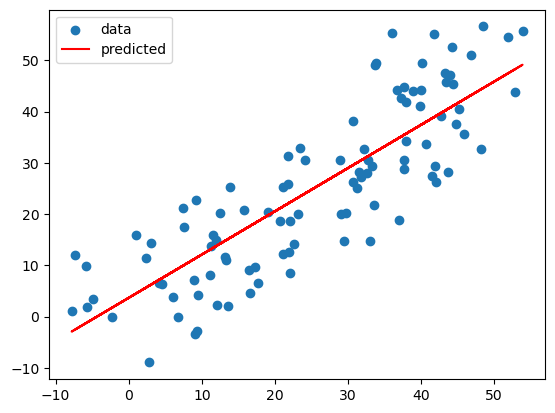

In [33]:
model = LinearModel()
model.train(X, y, epochs =50)  # add > number of epochs than default for better training (after 20 epochs loss is <, but not close to 0)
plt.scatter(X, y, label = 'data')
plt.plot(X, model.predict(X), 'r-', label='predicted')  # plot the model with predictions; -r = redline
plt.legend()